# Big Data Bandits

A Project-Group of the DHBW Karlsruhe participating in a AI-powerd World.

# In wie weit ist Marktmanipulation durch Privatpersonen auf Sozialmedia möglich?

## Inhalstverzeichnis ##
1. [Einleitung](#1-einleitungEinleitung)
2. [Datensätze](#2-datensätzeDatensätze)
2. [Code](#3-codeCode)
    1. [Datensätze einlesen](#31-datensätze-einlesen)
    2. [Datenverständnis](#32-datenverständnis)
        1. [Datendichte](#321-datendichte)
    3. [Hilfsmethoden](#33-hilfsmethoden)
        1. [Intervalselection](#331-intervalselection)
        2. [Aktienverlauf](#332-aktienverlauf)
    4. [Hauptschleife](#34-hauptschleife)
    6. [Darstellung](#35-darstellung)
        1. [Korrelationstabelle](#351-korrelationstabelle)
        2. [Posts](#351-posts)
        3. [Trend](#352-trend)
        4. [Absolut](#353-absolut)
        5. [Durchschnitt](#354-durchschnitt)
3. [Auswertung](#4-auswertung)
4. [Fazit](#5-fazit)

<a name="einleitung"></a>
## 1. Einleitung ##
Im folgenden Abstract soll dieser Frage nachgegangen werden.
Dafür betrachten wir insbesondere die Beziehungen zwischen dem Aktienkurs der Kryptowährung **Dogecoin (DGCN)**, sowie dem Nutzungsverhalten von **Elon Musk** auf der Plattform **X** (ehemalig Twitter).
Dabei ist uns natürlich bewusst, dass Elon Musk aufgrund seiner Reichweite und Popularität eine sehr dominate und übergeordnete Rolle spielt. Jedoch zeigt genau dieses Beispiel interresante und unerwartete Zusammenhänge.

<a name="datensätze"></a>
## 2. Datensätze ##
Die Datensätze bli bla blub ...

<a name="code"></a>
## 3. Code ##
Der Code ermöglicht eine graphische Darstellung der Zusammenhänge aller Posts (Tweets) mit den Veränderrungen im Aktienkurs.
Dafür enthält der Code alle notwendigen Abschnitte, um eine sinnstiftende Einordnung der Daten und Parameter in den Kontext der Fragestellung zu ermöglichen. Dafür werden diese Librarys verwendet.

In [83]:
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

<a name="datensätze_einlesen"></a>
### 3.1. Datensätze einlesen ###
Zu Beginn der Analyse werden die Datensätzte in einen Pandas Dataframe eingelsesen. Dabei werden ebenfalls die Daten der "Date" bzw. "Datetime" Spalte korrekt als python datetime object geparst, um eine zukünftige, datumsbasierte Weiterverarbeitung zu erleichtern. Dies geschieht durch den Lambda Ausdruck: *datetime.strptime(x[0:10], '%Y-%m-%d')* der auf die Entsprechedne Spalte angewandt wird. Dabei enthält jeder String der entsprechenden Spalte bis zum 10. Character das Datum formatiert in Jahr-Monat-Tag. Uhrzeiten und andere folgenden Zeitrefferenzen werden einfach abgeschnitten.

In [84]:
dateparse = lambda x: datetime.strptime(x[:10], '%Y-%m-%d')

#Read the CSV files and put them into pandas DataFrame objects
Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse).rename(columns={'datetime': 'date'})
Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv', parse_dates=['date'], date_parser=dateparse)
Tesla:pd.DataFrame = pd.read_csv('./datasets/tesla.csv', parse_dates=['date'], date_parser=dateparse)

display(Posts.head())
display(Tesla.head())
display(Dogecoin.head())

C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_2244\3951701588.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Posts:pd.DataFrame = pd.read_csv('./datasets/elonmusk.csv', parse_dates=['datetime'], date_parser=dateparse).rename(columns={'datetime': 'date'})
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_2244\3951701588.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Dogecoin:pd.DataFrame = pd.read_csv('./datasets/dogecoin.csv', parse_dates=['date'], date_parser=dateparse)
C:\Users\ZODWEISS\AppData\Local\Temp\ipykernel_2244\3951701588.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or rea

,date,tweet id,text,username
0,2023-06-29,1674452749378002945,@mwseibel Yup,elonmusk
1,2023-06-29,1674446089179766789,@TitterDaily True,elonmusk
2,2023-06-29,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk
3,2023-06-29,1674226170488057856,Improved longform posts,elonmusk
4,2023-06-28,1674116945808068608,@BillyM2k Best protip ever,elonmusk


,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN


,date,open,high,low,raw_close,close,volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


<a name="datenverständnis"></a>
### 3.2. Datenverständnis ###
Bli Bla Blub

<a name="datendichte"></a>
#### 3.2.1. Datendichte ###
Der nun folgende Abschnitt erstellt eine grafische Übersicht, welche die fehlenden Tage aus den Datensätzend entsprechend dem Datum aufträgt.
Dafür erstellt die Methode *get_density* einen abgeleitenden Datensatz von dem zu betrachtenden Datensatz. 
Dieser neue Datensatz enthält nun in der Spalte "date" alle Daten, die bei Vollständigkeit in dem zu untersuchenden Datensatz enthalten sein müssten.
Die Spalte "exists" enthält nun für jedes Datum den entsprechenden Integer/Boolean Wert 1 oder 0.
Dabei bedeutet eine 1, das der Tag im untersuchten Datensatz existiert, während eine 0 für einen fehlenden Tag im untersuchten Datensatz steht.

In [85]:
def get_density(df:pd.DataFrame):
    start_date = min(df["date"]).replace(hour=0, minute=0, second=0, microsecond=0)
    end_date = max(df["date"]).replace(hour=0, minute=0, second=0, microsecond=0) + pd.Timedelta(days=1)

    all_dates = pd.DataFrame({'date': pd.date_range(start_date, end_date, freq='D')})
    all_dates['exists'] = all_dates['date'].isin(df["date"]).astype(int)

    return all_dates

Im Folgenden werden für alle 3 Datensätze diese Ableitungen erstellt.

In [86]:
Posts_density = get_density(Posts)
Tesla_density = get_density(Tesla)
Dogecoin_density = get_density(Dogecoin)

Daraufhin können diese neuen Datensätze unter Verwendung von PyPlot graphisch dargestellt werden.
Dabei ist insbesondere die Größe des Plots relevant, da sonst die wenigen fehlenden Werte in der Gesamtmasse untergehen würden.
So werden jeweils zunächst die exsistenten Tage in blau aufgetragen, anschließend werden die fehlenden Tage in rot ergänzt.

Text(2017-11-09 00:00:00, 4.5, 'Dogecoin')

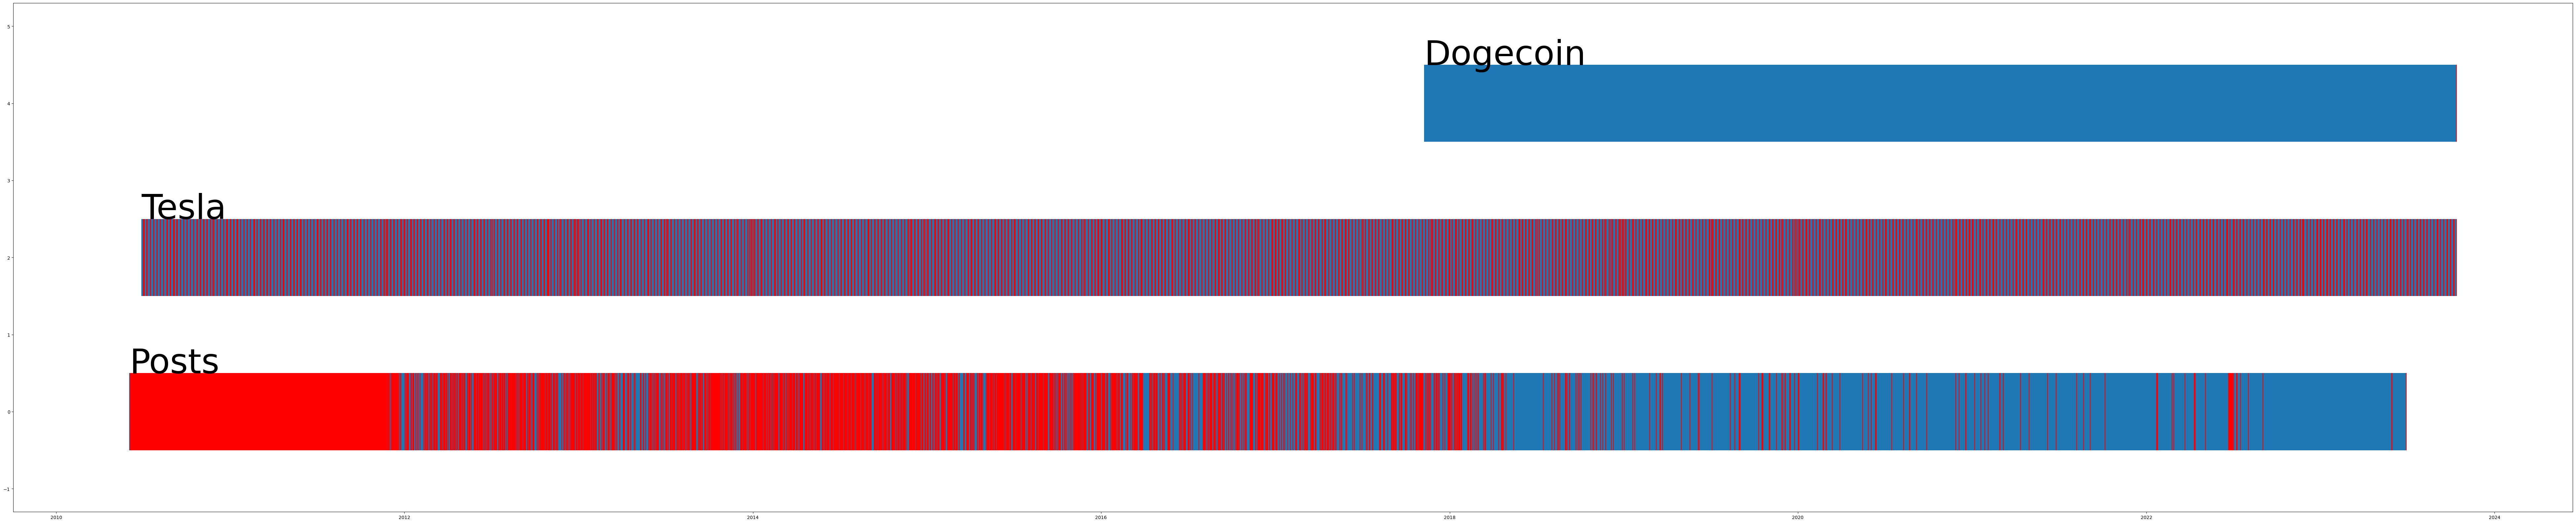

In [87]:
plt.figure(figsize=(100,20))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.eventplot(Posts_density.loc[Posts_density['exists'] == 1, 'date'], lineoffsets=0, label = "Posts")
plt.eventplot(Posts_density.loc[Posts_density['exists'] == 0, 'date'], lineoffsets=0, colors=['red'])

plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 1, 'date'], lineoffsets=2, label = "Tesla")
plt.eventplot(Tesla_density.loc[Tesla_density['exists'] == 0, 'date'], lineoffsets=2, colors=['red'])

plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 1, 'date'], lineoffsets=4, label = "Dogecoin")
plt.eventplot(Dogecoin_density.loc[Dogecoin_density['exists'] == 0, 'date'], lineoffsets=4, colors=['red'])

plt.text(Posts_density.loc[Posts_density['exists'] == 1, 'date'].iloc[0], 0.5, 'Posts', color='black', fontsize=75)
plt.text(Tesla_density.loc[Tesla_density['exists'] == 1, 'date'].iloc[0], 2.5, 'Tesla', color='black', fontsize=75)
plt.text(Dogecoin_density.loc[Dogecoin_density['exists'] == 1, 'date'].iloc[0], 4.5, 'Dogecoin', color='black', fontsize=75)

Zuguterletzt lassen wir uns noch den fehlenden Anteil der Daten im Verhältnis zum gesamten Datensatz in Prozent ausgeben.

<BarContainer object of 3 artists>

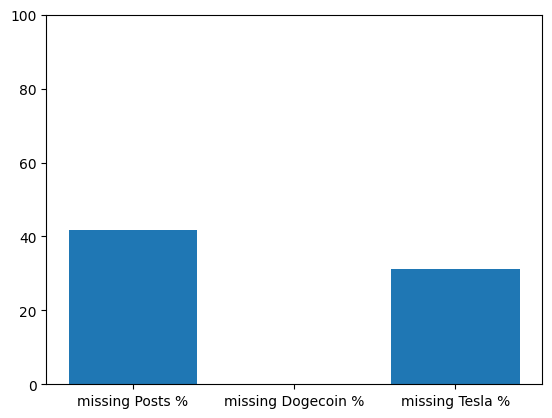

In [88]:
plt.ylim(0, 100)

plt.bar(
    ["missing Posts %", "missing Dogecoin %", "missing Tesla %"], 
    [
        (Posts_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Dogecoin_density['exists'].value_counts(normalize=True) * 100).get(0, 0),
        (Tesla_density['exists'].value_counts(normalize=True) * 100).get(0, 0)
     
    ]
)

<a name="hilfsmethoden"></a>
### 3.3 Hilfsmethoden ###
Im Weiteren definieren wir ein paar Hilfsfunktionen, die uns kleinere Nebenberechnungen im Verlauf der Analyse abnehmen. Dies reduziert insbesondere die Größe der Hauptschleife und erhöht die insgesamte Übersichtlichkeit des Codes.

<a name="intervalselection"></a>
#### 3.3.1 Intervalselection ####
Die Methode *check_filter()* erkennt, ob in einem Text gewisse Schlüsselwörter aus einer Filter-Liste enthalten sind. Dies ermöglicht das Filtern der Posts anhand der evtl. im Post (Tweet) enthaltenen Schlüsselwörter (bsp.: "Dogecoin"). Dabei kann in abhängigkeit der Variable hit, entwedern nach dem vorhandenen sein (hit=True) oder dem fehlen (hit=Flase) der Schlüsselwörter sortiert werden.

Die Methode *get_interval* generiert einen Datensatz-Ausschnitt, der ausgehend von einem Startdatum die nächsten vorhandenen n Tage aus einem Stock-Datensatz enthält. Die Anzahl der Tage wird durch den Parameter *interval_length* gegeben und beträgt Standartmäßig den Wert 5 (eine Arbeitwoche). Es wird auserdem berücksichtigt, dass das Startdatum nicht im Stock-Datensatz enthalten ist. In diesem Fall nimmt das Unterprogramm das nächste vorhandene Datum. Ausgehend von dem gefundenen Datum, werden der Start-Index sowie der End-Index des Datensatz-Ausschnittes berechnet. Dabei wird berücksichtigt, dass das End-Datum ggf. nicht mehr im Datensatz ethalten ist. Trifft dies zu, kann kein Interval erstellt werden und es wird None zurückgegeben. (Dieser Fall ist jedoch bei unseren Datensätzen nicht zwingend zu berücksichtigen, da die Stock-Datensätze deutlich aktueller sind, als der Datensatz der Posts (Tweets), aus dem das Startdatum stammt.)

In [89]:
def check_filter(text:str, filter_list:list, hit:bool):
    for filter in filter_list:
        if filter in text:
            return hit
    return not hit

def get_interval(search_date:datetime, stock:pd.DataFrame, interval_length:int=5):
    search_date = search_date - datetime.timedelta(days=1)

    #find the start date under the consideration that the given startdate does not exist
    next_available_startdate = stock.loc[stock['date'] >= search_date, 'date'].min()

    start_index = stock[stock['date'] == next_available_startdate].index[0]
    end_index = start_index + interval_length

    if end_index > stock.index[-1]:
        return None
    else:
        return stock.iloc[start_index:end_index]

<a name="aktienverlauf"></a>
##### 3.3.2 Aktienverlauf #####
Die nun folgenden Hilfsmethoden werden dazu verwendet, die Änderrung des Aktienkurses im gegeben Zeitraum zu ermöglichen.
Dafür betrachten wir die Spalte "close", die dem täglichen Abschlusswert der Aktie entspricht

So berechnet die Methode *get_absolute()* den prozentualen Unterschied zwischen dem ersten sowie letzten Tag des Intervals.
Dies erfolgt durch die Formel d_0 / d_n * 100, dabei entspricht d_0 dem ersten Tag und d_n dem letzten Tag des Intervalls:

Die nachfolgende Methode **get_trend()** ist ein wichtiges Kernstück der Analyse.
Diese Funktion ermittelt mit Hilfe einer linearen Regression eine Gerade, welche das Wachstum einer Aktie für einem gegebenen Zeitraum repräsentiert.
Anschliesend wird mit hilfe des Modells der erwartete Wert der Aktie für den ersten bzw. letzten Tag des zu betrachtenden Intervals berechnet.
Mit diesen beiden abgeleiteten Werten kann nun wie in der Methode *get_absolute()* beschrieben der prozentualen Unterschied kalkuliert werden.
Dieses Verfahren hat den Vorteil, dass nun alle Werte des Intervalls gleichermasen berücksichtigt werden.

In [90]:
def get_absolute(stock_part:pd.DataFrame):
    initial = stock_part.iloc[0]["close"]
    final = stock_part.iloc[-1]["close"]
    return (final - initial) / abs(initial) * 100

def get_trend(stock_part:pd.DataFrame):
    colses_of_interval:list = stock_part["close"].tolist()
    
    x = np.array(range(len(colses_of_interval))).reshape(-1, 1)
    y = np.array(colses_of_interval)

    model = LinearRegression().fit(x, y)

    x_first = np.array([0]).reshape(-1, 1)
    x_last = np.array([len(colses_of_interval) - 1]).reshape(-1, 1)

    y_first = model.predict(x_first)[0]
    y_last = model.predict(x_last)[0]

    change_percentage = round((y_last / y_first), 4)

    return [change_percentage, model]

<a name="Hauptschleife"></a>
### 3.4 Hauptschleife ###
Die Hauptfunktion umfasst die grundlegende Schleife zur Auswertung der Datensätze in Bezug auf die Fragestellung.
Dafür wird ein neuer Datensatz "influence" erstellt, der für jeden Tag, an dem ein Post mit den entsprechenden Filterkriterien verfasst wurde, das Datum, eine Liste aller Posts, die Anzahl dieser Posts sowie den prozentualen Unterschied der dafür vorgesehenen Hilfsfunktionen enthält.
So iteriert diese Schleife zunächst über alle Posts (Tweets), die im Datensatz Posts enthalten sind.
Im Anschluss wird nun durch die Methode *check_filter* überprüft, ob die aktuelle Zeile den Filteransprüchen gerecht wird.
Trifft dies nicht zu, so wird diese Zeile übersprungen.
Ansonsten wird das Datum aus der aktuellen Zeile ausgelesen.
Im Folgenden wird nun überprüft ob der aktuelle Tag schon im Datensatz "influence" enthalten ist, was passiert wenn an einem Tag mehrere Posts vorliegen. Trifft dies zu, so wird dieser nur um den aktuellen Posttext ergänzt, sowie die Anzahl der Posts an diesem Tag inkrementiert.
Ist dieser Tag noch nicht im Datensatz influences enthalten, so wird für den aktuellen Tag zunächst das Intervall des Stock-Datensatzes bestimmt.
Ist dies nicht möglich, so wird eine Warnung Ausgegeben und die Schleif fährt fort.
(Dies ist jedoch wie in 3.3.1 beschrieben zu vernachlässigen).
Wenn das Interval erfolgreich erstellt wurde, werden nun alle Berechnungen auf das Interval angewandt.
Schlussendlich werden nun alle Werte unter diesem Tag in den Datensatz "influences" eingefügt.
Hat die Schleife nun alle Posts abgearbeitet, kann nun dieser Datensatz zurückgegeben werden.
Zudem wird nun noch der prozentuale Anteil der im "influence" enthaltenen Posts von allen Posts ermittelt und zurück gegeben werden.

In [91]:
def get_influence(stock:pd.DataFrame, posts:pd.DataFrame=Posts, filter_list:list=[], hit:bool=False,):
    # find a common start date
    start_date = max(posts['date'].min(), stock['date'].min())
    # adjust Posts to startdate
    posts = posts[posts['date'] >= start_date]
    # adjust Stock to startdate
    stock = stock[stock['date'] >= start_date]

    influence:pd.DataFrame = pd.DataFrame(columns=['date', 'posts', 'count_posts', 'trend', 'absolute'])
    j = 0
    old_date = None
    
    for i, post in posts.iterrows():
        if not check_filter(str(post['text']), filter_list, hit=hit):
            continue
        else:
            date = pd.to_datetime(post['date']).normalize()
            
            if not date == old_date:
                interval = get_interval(date, stock)

                if interval is None:
                    print("No Data Available")
                    continue

                cp_trend, model = get_trend(interval)
                cp_absolute = get_absolute(interval)
                influence.loc[j] = [date] + [[post['text']]] + [0] + [cp_trend] + [cp_absolute]
                old_date = date
                j += 1

            else:
                influence.loc[j-1, 'posts'].append(post['text'])
                influence.loc[j-1, 'count_posts'] += 1
    return [influence, j/i*100]


<a name="darstellung"></a>
### 3.5 Darstellung ###
<a name="Korrelationstabelle"></a>
##### 3.5.1 Korrelationstabelle #####

In [92]:
import datetime

filter_doge = ["doge", "Doge", "DOGE"]
filter_tesla = ["tesla", "Tesla", "TESLA", "TSLA", "tsla"]

influences_t_d, part_t_d = get_influence(Dogecoin, Posts, [], False) #total Dogecoin
influences_t_t, part_t_t = get_influence(Tesla, Posts, [], False) #total Tesla

influences_n_d, part_n_d = get_influence(Dogecoin, Posts, filter_doge, False) #no Dogecoin
influences_w_d, part_w_d = get_influence(Dogecoin, Posts, filter_doge, True) #with Dogecoin

influences_n_t, part_n_t = get_influence(Tesla, Posts, filter_tesla, False) #no Tesla
influences_w_t, part_w_t = get_influence(Tesla, Posts, filter_tesla, True) #with Tesla

influences_n_dt, part_n_dt = get_influence(Tesla, Posts, filter_doge + filter_tesla, False) #no (Doge or Tesla)
influences_w_dt, part_w_dt = get_influence(Tesla, Posts, filter_doge + filter_tesla, True) #with (Doge or Tesla)

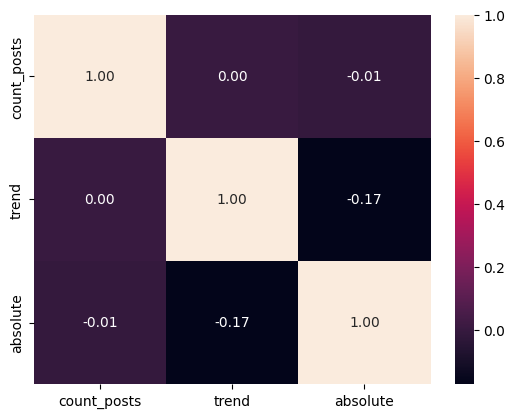

In [93]:
influences_corr = pd.concat(
    [
        influences_t_d[['count_posts', 'trend', 'absolute']],
        influences_t_t[['count_posts', 'trend', 'absolute']],
        influences_n_d[['count_posts', 'trend', 'absolute']],
        influences_w_d[['count_posts', 'trend', 'absolute']],
        influences_n_t[['count_posts', 'trend', 'absolute']],
        influences_w_d[['count_posts', 'trend', 'absolute']],
        influences_n_dt[['count_posts', 'trend', 'absolute']],
        influences_w_dt[['count_posts', 'trend', 'absolute']],
    ]
).corr()

sns.heatmap(influences_corr, annot=True, fmt=".2f")
plt.show()

<a name="posts"></a>
##### 3.5.1 Posts #####

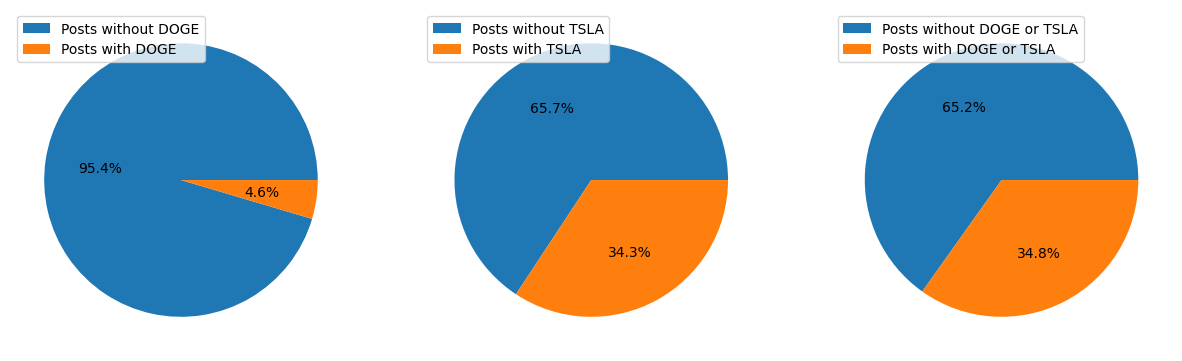

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Erstes Pie-Chart (DOGE)
axs[0].pie([part_n_d, part_w_d], autopct='%1.1f%%')
axs[0].legend(labels=["Posts without DOGE", "Posts with DOGE"], loc="upper left")

# Zweites Pie-Chart (TSLA)
axs[1].pie([part_n_t, part_w_t], autopct='%1.1f%%')
axs[1].legend(labels=["Posts without TSLA", "Posts with TSLA"], loc="upper left")

# Drittes Pie-Chart (DOGE und TSLA)
axs[2].pie([part_n_dt, part_w_dt], autopct='%1.1f%%')
axs[2].legend(labels=["Posts without DOGE or TSLA", "Posts with DOGE or TSLA"], loc="upper left")
plt.show()

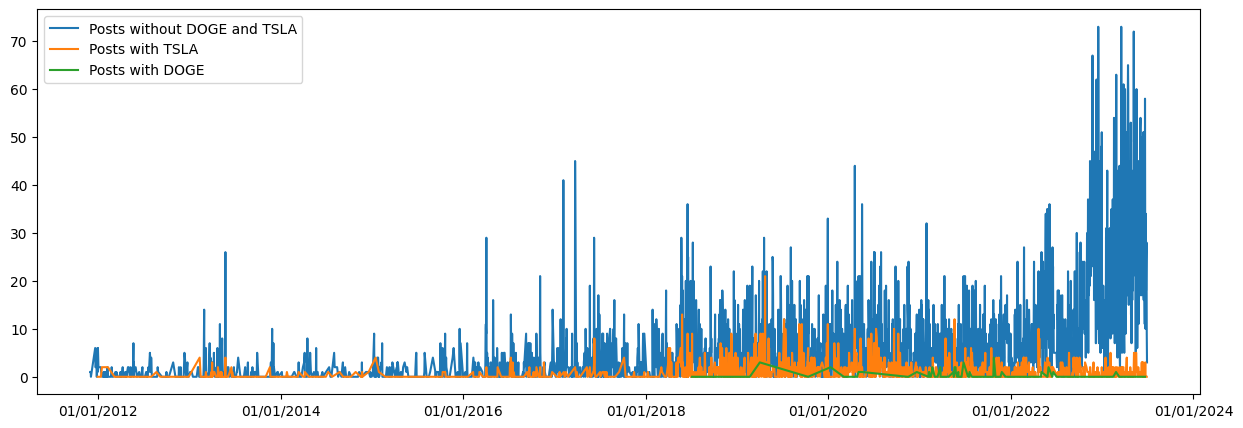

In [95]:
plt.figure(figsize=(15, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))

plt.plot(influences_n_dt['date'], influences_n_dt['count_posts'])
plt.plot(influences_w_t['date'], influences_w_t['count_posts'])
plt.plot(influences_w_d['date'], influences_w_d['count_posts'])
plt.legend(labels=["Posts without DOGE and TSLA", "Posts with TSLA", "Posts with DOGE"], loc="upper left")

<a name="trend"></a>
##### 3.5.2 Trend #####

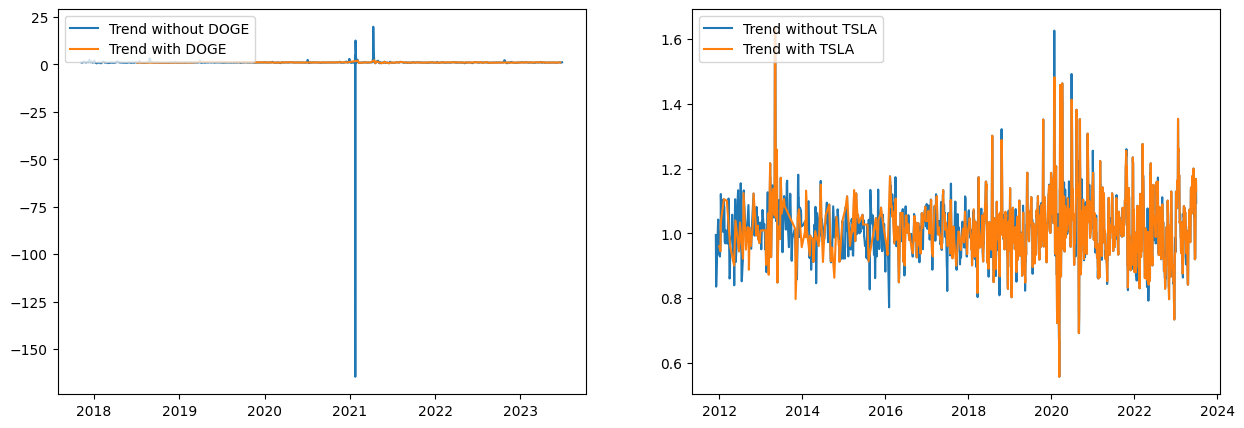

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[0].plot(influences_n_d['date'], influences_n_d['trend'])
axs[0].plot(influences_w_d['date'], influences_w_d['trend'])
axs[0].legend(labels=["Trend without DOGE", "Trend with DOGE"], loc="upper left")

axs[1].plot(influences_n_t['date'], influences_n_t['trend'])
axs[1].plot(influences_w_t['date'], influences_w_t['trend'])
axs[1].legend(labels=["Trend without TSLA", "Trend with TSLA"], loc="upper left")

<a name="absolut"></a>
##### 3.5.3 Absolut #####

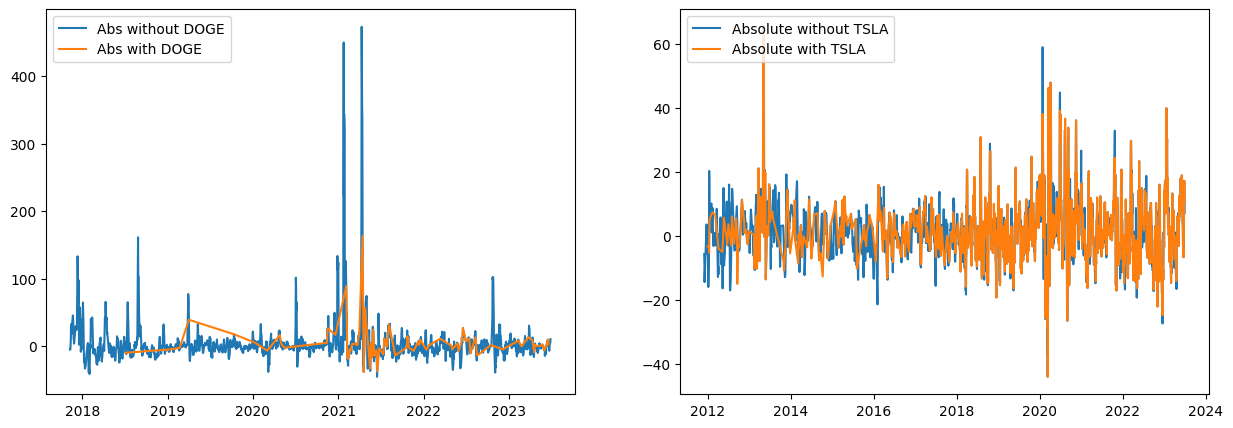

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs[0].plot(influences_n_d['date'], influences_n_d['absolute'])
axs[0].plot(influences_w_d['date'], influences_w_d['absolute'])
axs[0].legend(labels=["Abs without DOGE", "Abs with DOGE"], loc="upper left")

axs[1].plot(influences_n_t['date'], influences_n_t['absolute'])
axs[1].plot(influences_w_t['date'], influences_w_t['absolute'])
axs[1].legend(labels=["Absolute without TSLA", "Absolute with TSLA"], loc="upper left")

<a name="darstellung"></a>
##### 3.5.4 Durchschnitt #####

<BarContainer object of 2 artists>

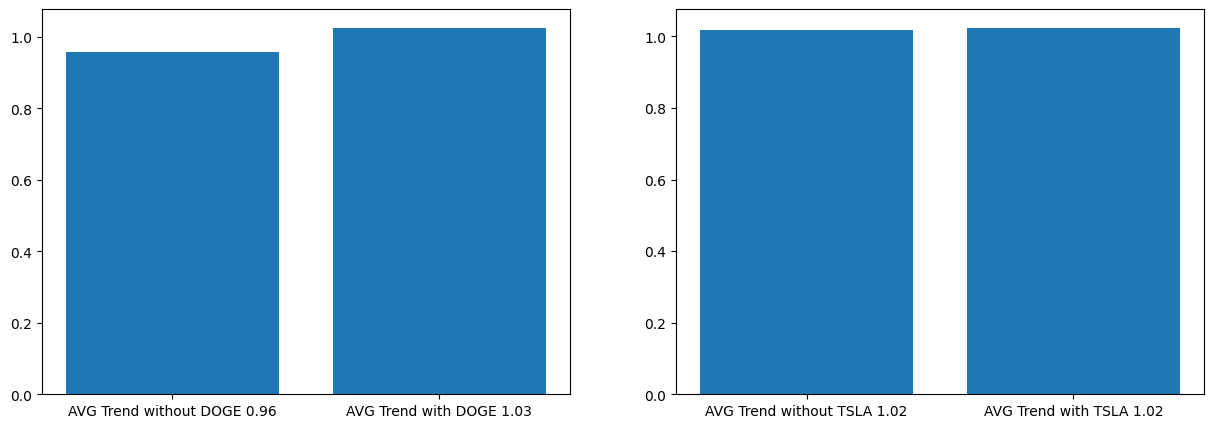

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

influences_d_trend_avg = [influences_n_d['trend'].mean(), influences_w_d['trend'].mean()]
influences_t_trend_avg = [influences_n_t['trend'].mean(), influences_w_t['trend'].mean()]

axs[0].bar([f"AVG Trend without DOGE {round(influences_d_trend_avg[0],2 )}", f"AVG Trend with DOGE {round(influences_d_trend_avg[1],2)}"], influences_d_trend_avg)
axs[1].bar([f"AVG Trend without TSLA {round(influences_t_trend_avg[0],2)}", f"AVG Trend with TSLA {round(influences_t_trend_avg[1],2)}"], influences_t_trend_avg)

<BarContainer object of 2 artists>

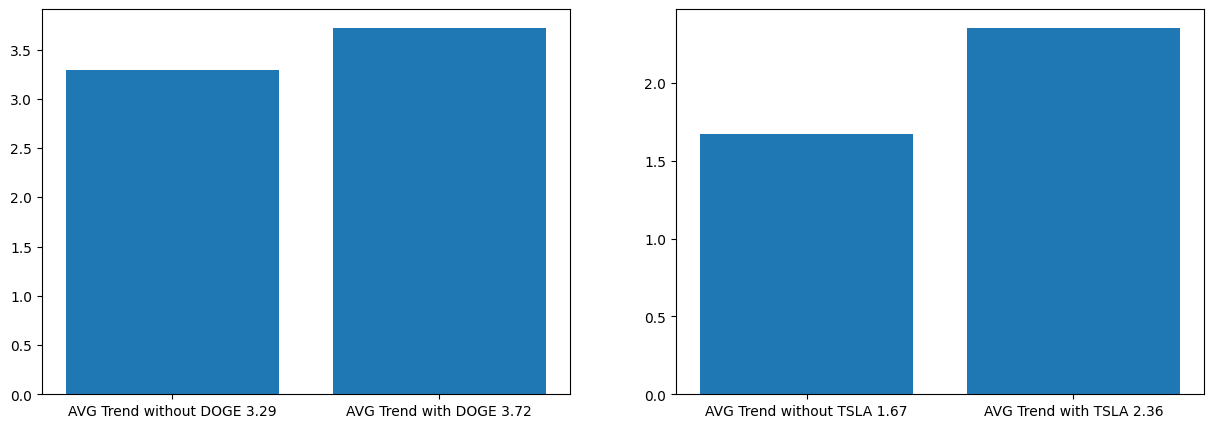

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

influences_d_absolute_avg = [influences_n_d['absolute'].mean(), influences_w_d['absolute'].mean()]
influences_t_absolute_avg = [influences_n_t['absolute'].mean(), influences_w_t['absolute'].mean()]

axs[0].bar([f"AVG Trend without DOGE {round(influences_d_absolute_avg[0],2 )}", f"AVG Trend with DOGE {round(influences_d_absolute_avg[1],2)}"], influences_d_absolute_avg)
axs[1].bar([f"AVG Trend without TSLA {round(influences_t_absolute_avg[0],2)}", f"AVG Trend with TSLA {round(influences_t_absolute_avg[1],2)}"], influences_t_absolute_avg)

In [100]:
max_trend_w_d = influences_w_d.loc[influences_w_d["trend"].idxmax()]
max_absolute_w_d = influences_w_d.loc[influences_w_d["absolute"].idxmax()]

max_trend_w_t = influences_w_t.loc[influences_w_t["trend"].idxmax()]
max_absolute_w_t = influences_w_t.loc[influences_w_t["absolute"].idxmax()]

print(list(set(max_trend_w_d["posts"] + max_absolute_w_d["posts"])))
print(list(set(max_trend_w_t["posts"] + max_absolute_w_t["posts"])))

['@sadiaslayy @DogecoinBets 😮']
["@TeslaTrip you're welcome :)", 'There is a way for the Tesla Model S to be recharged throughout the country faster than you could fill a gas tank.', '@HowardReiter Totally agree. Tesla will circle back and do something cool for Roadsters next year.']


<a name="auswertung"></a>
## 4 Auswertung ##

<a name="fazit"></a>
## 5 Fazit ##
blal bla